In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
import keras.backend as K

In [3]:
# Read the data (assuming you have it in a CSV file)
data = pd.read_csv("sugar_test.csv", parse_dates=["Date"], index_col="Date")

In [4]:
df=data.drop(['Commodity','Region','Year_Issued','Month'],axis=1)

In [5]:
df.head()

,Price
Date,
2000-01-01,6.0
2000-01-02,8.0
2000-01-03,10.0
2000-01-04,11.0
2000-01-05,12.0


In [6]:
# Split data into train and test sets
train_data, test_data = df[:240], df[240:]

In [7]:
train_data.shape, test_data.shape

((240, 1), (24, 1))

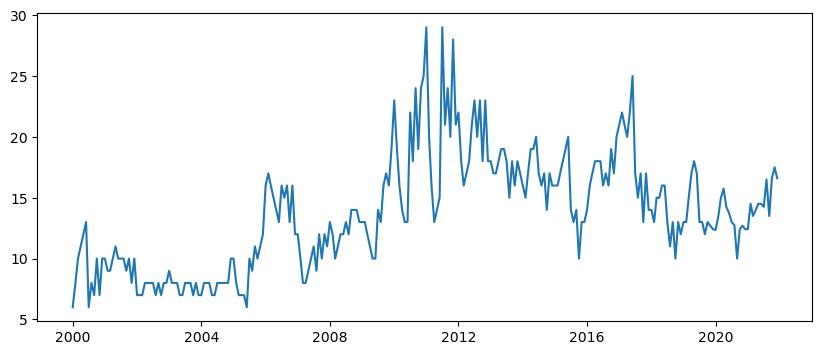

In [11]:
plt.figure(figsize=(10,4))
plt.plot(df)
plt.show()

In [8]:
X_train = []
y_train = []

for i in range(12, train_data.shape[0]):
    X_train.append(train_data.iloc[i-12:i, 0])
    y_train.append(train_data.iloc[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

## Reshape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (X_train.shape[0], 1,1))
X_train.shape, y_train.shape

((228, 12, 1), (228, 1, 1))

In [9]:
# Creating a data structure with 60 timesteps and 1 output
X_test = []
y_test = []

for i in range(12, test_data.shape[0]):
    X_test.append(test_data.iloc[i-12:i,0])
    y_test.append(test_data.iloc[i,0])

X_test, y_test = np.array(X_test), np.array(y_test)

## Reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
X_test.shape, y_test.shape

((12, 12, 1), (12,))

In [10]:
## Reshape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (X_train.shape[0], ))
X_train.shape, y_train.shape

((228, 12, 1), (228,))

In [11]:
## Reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_test = np.reshape(y_test, (X_test.shape[0], ))
X_test.shape, y_test.shape

((12, 12, 1), (12,))

In [36]:
early_stop = EarlyStopping(monitor='loss', patience=5)

In [37]:
# Build the LSTM model
K.clear_session()
model = Sequential()
model.add(LSTM(128, activation="relu",return_sequences=True, input_shape=(12, 1)))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mean_squared_error")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 100)               91600     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 158,261
Trainable params: 158,261
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Train the model
hist=model.fit(X_train, y_train, epochs=100, verbose=2, batch_size=12, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/100
19/19 - 2s - loss: 4.7855 - val_loss: 2.1738 - 2s/epoch - 114ms/step
Epoch 2/100
19/19 - 0s - loss: 4.3526 - val_loss: 2.1712 - 437ms/epoch - 23ms/step
Epoch 3/100
19/19 - 0s - loss: 4.2175 - val_loss: 2.4567 - 431ms/epoch - 23ms/step
Epoch 4/100
19/19 - 0s - loss: 4.1767 - val_loss: 2.3574 - 291ms/epoch - 15ms/step
Epoch 5/100
19/19 - 0s - loss: 4.0635 - val_loss: 2.4413 - 485ms/epoch - 26ms/step
Epoch 6/100
19/19 - 0s - loss: 4.0106 - val_loss: 2.4551 - 440ms/epoch - 23ms/step
Epoch 7/100
19/19 - 0s - loss: 3.9879 - val_loss: 2.4550 - 458ms/epoch - 24ms/step
Epoch 8/100
19/19 - 0s - loss: 3.9492 - val_loss: 2.4897 - 465ms/epoch - 24ms/step
Epoch 9/100
19/19 - 0s - loss: 3.8736 - val_loss: 2.5804 - 480ms/epoch - 25ms/step
Epoch 10/100
19/19 - 0s - loss: 3.8673 - val_loss: 2.6088 - 475ms/epoch - 25ms/step
Epoch 11/100
19/19 - 0s - loss: 3.7993 - val_loss: 2.5028 - 456ms/epoch - 24ms/step
Epoch 12/100
19/19 - 0s - loss: 3.8478 - val_loss: 2.7350 - 469ms/epoch - 25ms/step
Epo

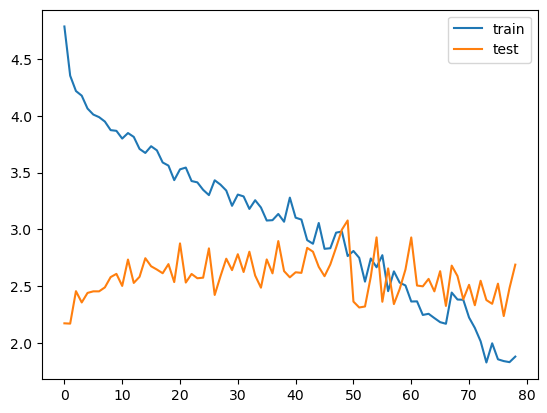

In [40]:
# Plot training history
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.show()

In [41]:
#  Evaluate RMSE on train and test sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
train_rmse = np.sqrt(np.mean((train_predictions - y_train) ** 2))
test_rmse = np.sqrt(np.mean((test_predictions - y_test) ** 2))
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

1/1 [==============================] - 0s 26ms/step
Train RMSE: 1.38
Test RMSE: 1.64


In [42]:
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
print(f"Train MSE: {train_rmse:.2f}")
print(f"Test MSE: {test_rmse:.2f}")

Train MSE: 1.38
Test MSE: 1.64


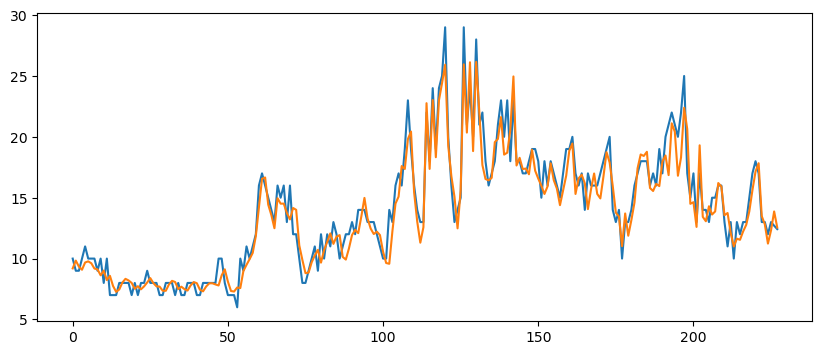

In [43]:
y_train = np.reshape(y_train, (X_train.shape[0],1))
plt.figure(figsize=(10,4))
plt.plot(y_train)
plt.plot(train_predictions)
plt.show()

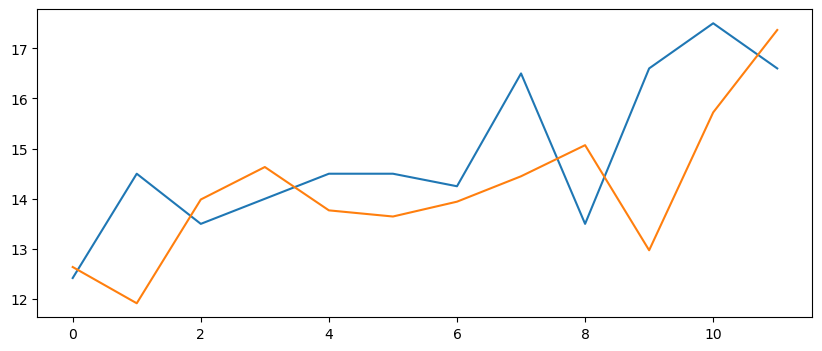

In [44]:
y_test = np.reshape(y_test, (X_test.shape[0],1))
plt.figure(figsize=(10,4))
plt.plot(y_test)
plt.plot(test_predictions )
plt.show()

####  For forecasting

In [45]:
X = []
y = []

for i in range(12, df.shape[0]):
    X.append(df.iloc[i-12:i, 0])
    y.append(df.iloc[i, 0])

X, y = np.array(X), np.array(y)
## Reshape
X = np.reshape(X, (X.shape[0], X.shape[1],1))
y = np.reshape(y, (X.shape[0], 1,1))
X.shape, y.shape

((252, 12, 1), (252, 1, 1))

In [46]:
# Train the model
hist=model.fit(X, y, epochs=100, verbose=2, batch_size=1,callbacks=[early_stop])

Epoch 1/100
252/252 - 5s - loss: 5.1132 - 5s/epoch - 21ms/step
Epoch 2/100
252/252 - 3s - loss: 4.7020 - 3s/epoch - 11ms/step
Epoch 3/100
252/252 - 3s - loss: 4.5615 - 3s/epoch - 12ms/step
Epoch 4/100
252/252 - 3s - loss: 4.0842 - 3s/epoch - 14ms/step
Epoch 5/100
252/252 - 4s - loss: 3.7982 - 4s/epoch - 14ms/step
Epoch 6/100
252/252 - 4s - loss: 4.0891 - 4s/epoch - 14ms/step
Epoch 7/100
252/252 - 3s - loss: 4.4520 - 3s/epoch - 13ms/step
Epoch 8/100
252/252 - 3s - loss: 4.1072 - 3s/epoch - 13ms/step
Epoch 9/100
252/252 - 4s - loss: 3.8234 - 4s/epoch - 14ms/step
Epoch 10/100
252/252 - 4s - loss: 3.7745 - 4s/epoch - 14ms/step
Epoch 11/100
252/252 - 4s - loss: 3.6133 - 4s/epoch - 14ms/step
Epoch 12/100
252/252 - 4s - loss: 3.4487 - 4s/epoch - 14ms/step
Epoch 13/100
252/252 - 3s - loss: 3.5226 - 3s/epoch - 13ms/step
Epoch 14/100
252/252 - 3s - loss: 3.5242 - 3s/epoch - 13ms/step
Epoch 15/100
252/252 - 4s - loss: 3.2557 - 4s/epoch - 14ms/step
Epoch 16/100
252/252 - 4s - loss: 3.3091 - 4s/epo

In [47]:
look_back=12
forecast_data = df[-look_back:]  # Use the last look_back months of data for the initial forecast
forecasted_values = []

for _ in range(12):
    forecast_input = np.reshape(forecast_data.values, (1, look_back, 1))
    forecasted_price = model.predict(forecast_input)
    forecasted_values.append(forecasted_price[0][0])
    # Convert forecast_data back to DataFrame to use .values in the next iteration
    forecast_data = pd.DataFrame(np.append(forecast_data.values[1:], forecasted_price)).tail(look_back)

1/1 [==============================] - 0s 23ms/step


In [48]:
forecast_data

,0
0,17.107300
1,15.723134
2,15.321612
3,15.576348
4,15.882133
5,16.164814
6,16.360565
7,16.227013
8,16.082260
9,16.169264


In [50]:
forecast_df = pd.DataFrame(forecasted_values, columns=['Forecasted Price'])
forecast_df.index = pd.date_range(start='2022-01-01', periods=12, freq='M')  # Set the index to months of 2022
forecast_df.to_csv('AAB_2_12_17_23_32_34_Forecast.csv')